Problem 1. The dataset sales.csv contains the daily sales of a product for 1000 days.Visually
demonstrate that the daily sales follows a normal distribution.

In this problem, you will be fitting a normal distribution to the observed dataset by
minimizing the negative log-likelihood function. Using the probability distribution function
for a normal distribution 𝑁 (𝜇, 𝜎2)with two parameters: mean 𝜇 and variance 𝜎2, obtain
the negative log-likelihood function. Using gradient descent, minimize the negative log-
likelihood function to estimate the parameters 𝜇 and 𝜎 that best explain the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [24]:
df = pd.read_csv('sales.csv')
sales = df[['DAILY SALES']]
sales.head()

,DAILY SALES
0,84
1,86
2,107
3,89
4,89


In [30]:
#types of columns in the dataframe
sales.dtypes

DAILY SALES    int64
dtype: object

In [31]:
#null
sales.isnull().sum()

DAILY SALES    0
dtype: int64

# Mathematical Formulation
-------------------------
**Negative Log-Likelihood Function**: 

The negative log-likelihood function for a normal distribution with mean $\mu$ and variance $\sigma^2$ is given by:


$$
-\log(L(\mu, \sigma^2)) = \frac{n}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

where $n$ is the number of observations and $x_i$ are the observed sales.

-------------------------
**Gradient Descent**: 

To minimize the negative log-likelihood function, we can use gradient descent, which iteratively updates the parameters $\mu$ and $\sigma^2$ in the direction that reduces the negative log-likelihood.

The update equations for the parameters using gradient descent are:

$$
\mu_{new} = \mu_{old} - \alpha \frac{\partial}{\partial \mu}(-\log(L(\mu, \sigma^2)))
$$

$$
\sigma^2_{new} = \sigma^2_{old} - \alpha \frac{\partial}{\partial \sigma^2}(-\log(L(\mu, \sigma^2)))
$$

where $\alpha$ is the learning rate.

The partial derivatives of the negative log-likelihood function with respect to $\mu$ and $\sigma^2$ are:

$$
\frac{\partial}{\partial \mu}(-\log(L(\mu, \sigma^2))) = -\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)
$$

$$
\frac{\partial}{\partial \sigma^2}(-\log(L(\mu, \sigma^2))) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

By iteratively applying these updates, we can find the values of $\mu$ and $\sigma^2$ that minimize the negative log-likelihood, thus fitting the normal distribution to the data.

(array([0.00068182, 0.        , 0.00068182, 0.        , 0.00136364,
        0.        , 0.00272727, 0.00136364, 0.00340909, 0.        ,
        0.00136364, 0.00409091, 0.00477273, 0.00477273, 0.00409091,
        0.01022727, 0.00818182, 0.01636364, 0.01159091, 0.01840909,
        0.00886364, 0.02181818, 0.00818182, 0.02795455, 0.01295455,
        0.02590909, 0.01840909, 0.03613636, 0.01840909, 0.01636364,
        0.02931818, 0.02386364, 0.03818182, 0.01704545, 0.02863636,
        0.01704545, 0.03681818, 0.01977273, 0.03136364, 0.015     ,
        0.02113636, 0.01431818, 0.01704545, 0.00545455, 0.00681818,
        0.01295455, 0.00954545, 0.01159091, 0.00272727, 0.01022727,
        0.00477273, 0.00613636, 0.00068182, 0.00340909, 0.00272727,
        0.00340909, 0.        , 0.00204545, 0.        , 0.00068182]),
 array([ 33.        ,  34.46666667,  35.93333333,  37.4       ,
         38.86666667,  40.33333333,  41.8       ,  43.26666667,
         44.73333333,  46.2       ,  47.66666667,  49.

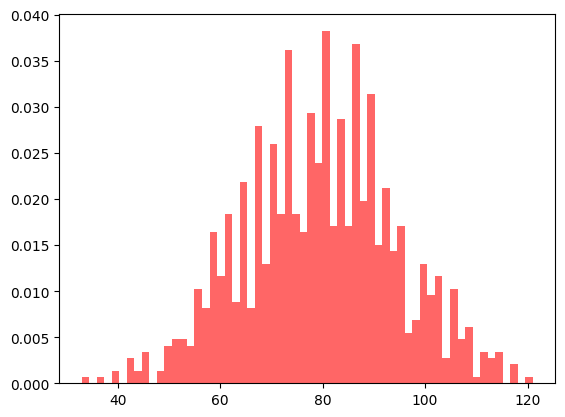

In [42]:
#histogram DAILY SALES
plt.hist(sales, bins=60, density=True, alpha=0.6, color='r')


In [62]:
# Negative log-likelihood function
def neg_log_likelihood(mu, sigma_sq, data):
    n = len(data)
    return (n/2)*np.log(2*np.pi*sigma_sq) + (1/(2*sigma_sq))*np.sum((data - mu)**2)

# Gradient of the negative log-likelihood function
def grad_neg_log_likelihood(mu, sigma_sq, data):
    grad_mu = -np.sum(data - mu) / sigma_sq
    grad_sigma_sq = -len(data)/(2*sigma_sq) + np.sum((data - mu)**2) / (2*sigma_sq**2)
    return grad_mu, grad_sigma_sq

# Gradient descent function
def gradient_descent(data, initial_mu, initial_sigma_sq, learning_rate, num_iterations):
    mu, sigma_sq = initial_mu, initial_sigma_sq
    for _ in range(num_iterations):
        grad_mu, grad_sigma_sq = grad_neg_log_likelihood(mu, sigma_sq, data)
        mu -= learning_rate * grad_mu
        sigma_sq -= learning_rate * grad_sigma_sq
        # Ensure that variance remains positive
        sigma_sq = max(sigma_sq, 1e-6)
    return mu, sigma_sq

# Extract the data
data = sales['DAILY SALES']

# Initial parameters
initial_mu = 50
initial_sigma_sq = 200

# Hyperparameters for gradient descent
learning_rate = 0.001
num_iterations = 5000

# Run gradient descent
estimated_mu, estimated_sigma_sq = gradient_descent(data, initial_mu, initial_sigma_sq, learning_rate, num_iterations)




In [63]:
# Print the estimated parameters
print(f"data mean: {np.mean(data)}")
print(f"data variance: {np.var(data)}")
print(f"Estimated mean (mu): {estimated_mu}")
print(f"Estimated variance (sigma^2): {estimated_sigma_sq}")

data mean: 79.379
data variance: 218.453359
Estimated mean (mu): 79.3789999996908
Estimated variance (sigma^2): 197.63435542062496


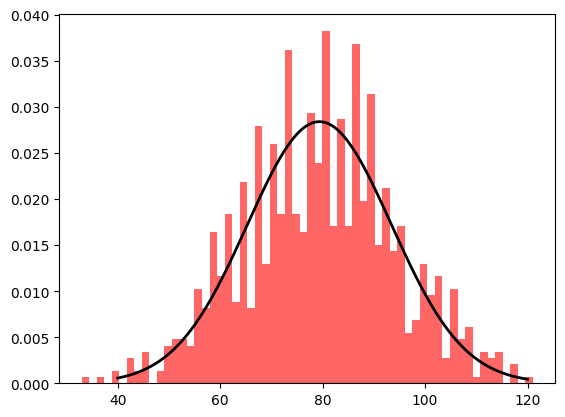

In [64]:
#plot the normal distribution
x = np.linspace(40, 120, 1000)
y = norm.pdf(x, estimated_mu, np.sqrt(estimated_sigma_sq))
plt.plot(x, y, 'k', linewidth=2)

#plot the histogram
plt.hist(sales, bins=60, density=True, alpha=0.6, color='r')
plt.show()